# Customer Churn Analysis

# Data Description

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_csv('customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Graphical Representation

Text(0.5, 1.0, 'Churn analysis')

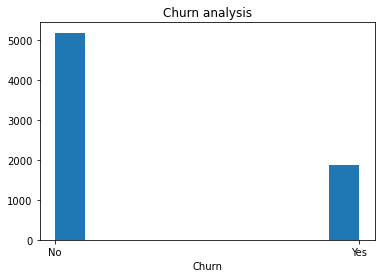

In [96]:
#Histogram plot for Price of the data.
plt.hist(df['Churn'])
plt.xlabel('Churn')
plt.title('Churn analysis')

<AxesSubplot:xlabel='Churn', ylabel='gender'>

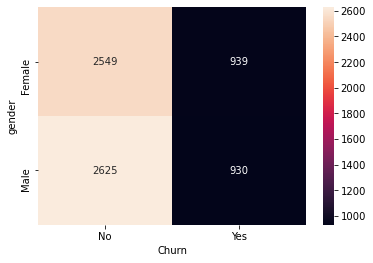

In [86]:
group=df.groupby(['gender','Churn'])
gender_Churn=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(gender_Churn, annot=True, fmt='d')

From heatmap clears that both the gender has almost same.

<AxesSubplot:xlabel='Churn', ylabel='SeniorCitizen'>

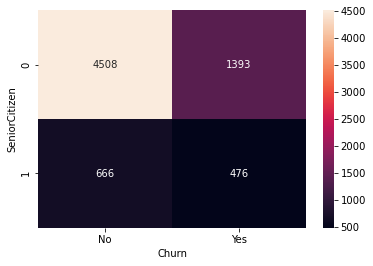

In [87]:
group=df.groupby(['SeniorCitizen','Churn'])
SeniorCitizen_Churn=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(SeniorCitizen_Churn, annot=True, fmt='d')

<AxesSubplot:xlabel='Churn', ylabel='Partner'>

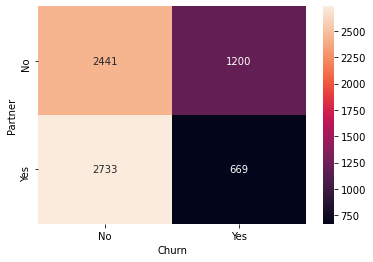

In [89]:
group=df.groupby(['Partner','Churn'])
Partner_Churn=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(Partner_Churn, annot=True, fmt='d')

From heatmap clears that  churn rate is low for partner features.

<AxesSubplot:xlabel='Churn', ylabel='Dependents'>

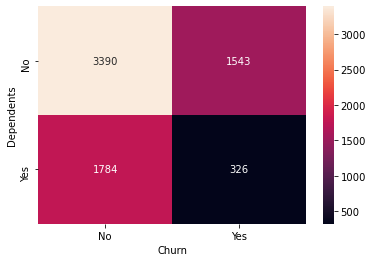

In [90]:
group=df.groupby(['Dependents','Churn'])
Dependents_Churn=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(Dependents_Churn, annot=True, fmt='d')

From heatmap clears that the churn rate is high for dependent features.

<AxesSubplot:xlabel='tenure', ylabel='count'>

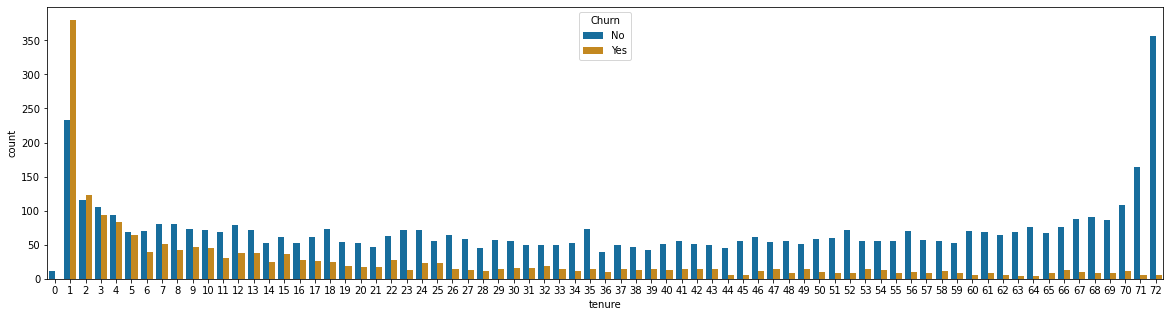

In [56]:
plt.subplots(figsize=(20,5))
sns.countplot(x='tenure',hue='Churn',data=df,palette='colorblind')

From countplot clears that churn rate is high for tenure features.

<AxesSubplot:xlabel='Churn', ylabel='PhoneService'>

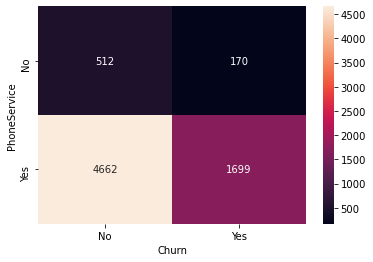

In [91]:
group=df.groupby(['PhoneService','Churn'])
PhoneService_Churn=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(PhoneService_Churn, annot=True, fmt='d')

from heatmap clears that churn rate is low for Phone service features.

<AxesSubplot:xlabel='Churn', ylabel='MultipleLines'>

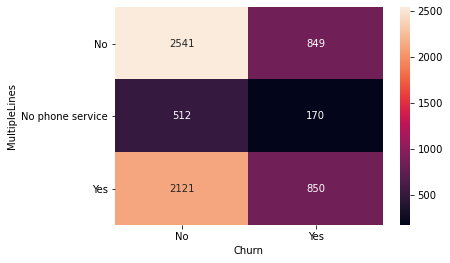

In [59]:
group=df.groupby(['MultipleLines','Churn'])
MultipleLines_Churn=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(MultipleLines_Churn, annot=True, fmt='d')

From heatmap shows that churn is linear for Multiple line features but no phone service has less count.

<AxesSubplot:xlabel='Churn', ylabel='InternetService'>

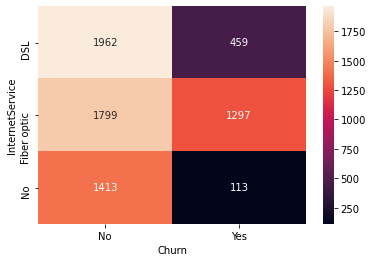

In [60]:
group=df.groupby(['InternetService','Churn'])
InternetService_Churn=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(InternetService_Churn, annot=True, fmt='d')

from heatmap clears that churn rate is low for Internet service features.

<AxesSubplot:xlabel='Churn', ylabel='OnlineSecurity'>

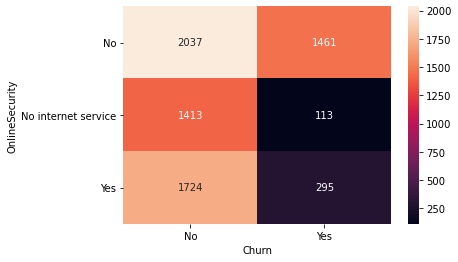

In [61]:
group=df.groupby(['OnlineSecurity','Churn'])
OnlineSecurity_Churn=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(OnlineSecurity_Churn, annot=True, fmt='d')

from heatmap clears that Churn rate is low for Online Security features.

<AxesSubplot:xlabel='Churn', ylabel='OnlineBackup'>

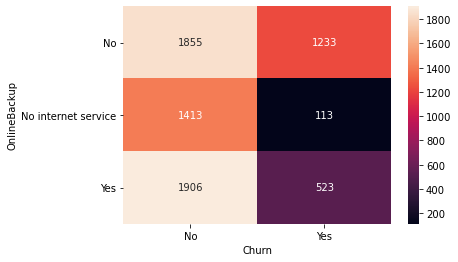

In [62]:
group=df.groupby(['OnlineBackup','Churn'])
OnlineBackup_Churn=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(OnlineBackup_Churn, annot=True, fmt='d')

from heatmap clears that churn rate is low for online backup features.

<AxesSubplot:xlabel='Churn', ylabel='DeviceProtection'>

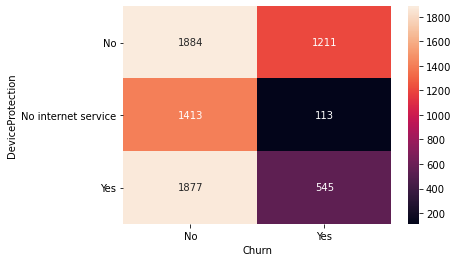

In [75]:
group=df.groupby(['DeviceProtection','Churn'])
DeviceProtection_Churn=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(DeviceProtection_Churn, annot=True, fmt='d')

From heatmap clears that churn rate is low for device protection features.

<AxesSubplot:xlabel='Churn', ylabel='TechSupport'>

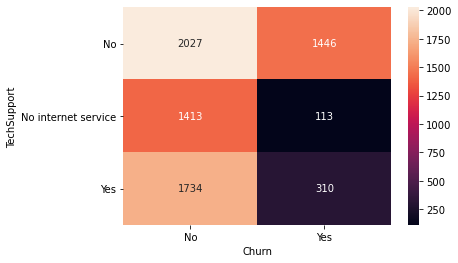

In [76]:
group=df.groupby(['TechSupport','Churn'])
TechSupport_Churn=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(TechSupport_Churn, annot=True, fmt='d')

From heatmap clears that churn rate is low for techsupport features.

<AxesSubplot:xlabel='Churn', ylabel='StreamingTV'>

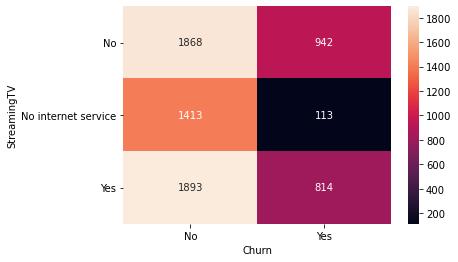

In [77]:
group=df.groupby(['StreamingTV','Churn'])
StreamingTV_Churn=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(StreamingTV_Churn, annot=True, fmt='d')

from heatmap clears that churn rate is low for streaming TV.

<AxesSubplot:xlabel='Churn', ylabel='StreamingMovies'>

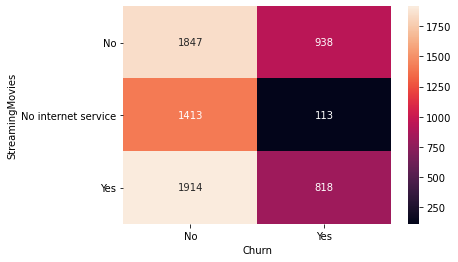

In [78]:
group=df.groupby(['StreamingMovies','Churn'])
StreamingMovies_Churn=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(StreamingMovies_Churn, annot=True, fmt='d')

from heatmap clears that churn rate is low for streaming movies features.

<AxesSubplot:xlabel='Churn', ylabel='Contract'>

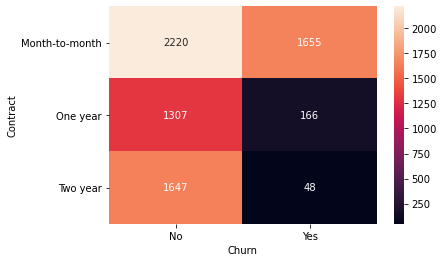

In [79]:
group=df.groupby(['Contract','Churn'])
Contract_Churn=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(Contract_Churn, annot=True, fmt='d')

from heatmap clears that churn rate is low for contract features.

<AxesSubplot:xlabel='Churn', ylabel='PaperlessBilling'>

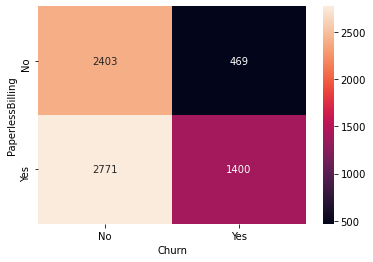

In [80]:
group=df.groupby(['PaperlessBilling','Churn'])
PaperlessBilling_Churn=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(PaperlessBilling_Churn, annot=True, fmt='d')

from heatmap clears that, the churn rate is low for paperless billing features.

<AxesSubplot:xlabel='Churn', ylabel='PaymentMethod'>

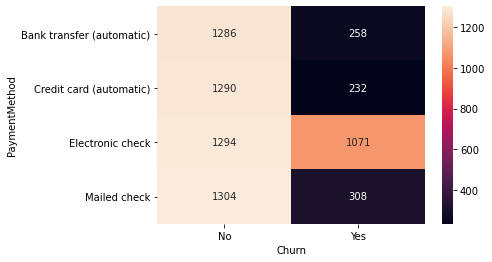

In [81]:
group=df.groupby(['PaymentMethod','Churn'])
PaymentMethod_Churn=group.size().unstack()
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(PaymentMethod_Churn, annot=True, fmt='d')

from heatmap clears that churn rate is low for payment method features.

<AxesSubplot:title={'center':'Monthly Charges'}, xlabel='MonthlyCharges', ylabel='Density'>

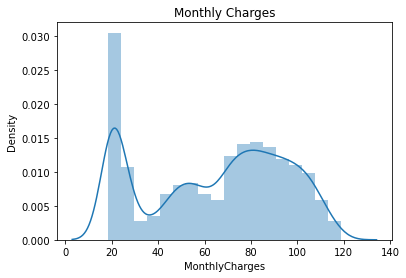

In [69]:
#Distplot for Next Tmin of data.
plt.title('Monthly Charges')
sns.distplot(df['MonthlyCharges'],kde=True)

from distplot clears that monthly charges distribution lies between 20 to 120.

Graphical Representation Conclusion

The columns that are going to be drop are customer Id.They are strings,cannot be categorized and don't contribute much to the outcome.

# Preprocessing

In [97]:
df.drop(['customerID'],axis=1,inplace=True)

In [98]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [99]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [100]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [101]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [102]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [103]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [104]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [105]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [106]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [107]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [108]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [109]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [110]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [111]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [112]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [113]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [114]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [115]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [116]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [117]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [118]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [119]:
df.info() #checking the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [120]:
df.columns #checking the number of columns in ths datset

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [121]:
df.dtypes #checking the datatypes of the dataset

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [122]:
df.shape #checking the number of rows and columns

(7043, 20)

In [123]:
df.isnull().sum() #checking the null values

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [124]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [125]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [126]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [127]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


<AxesSubplot:>

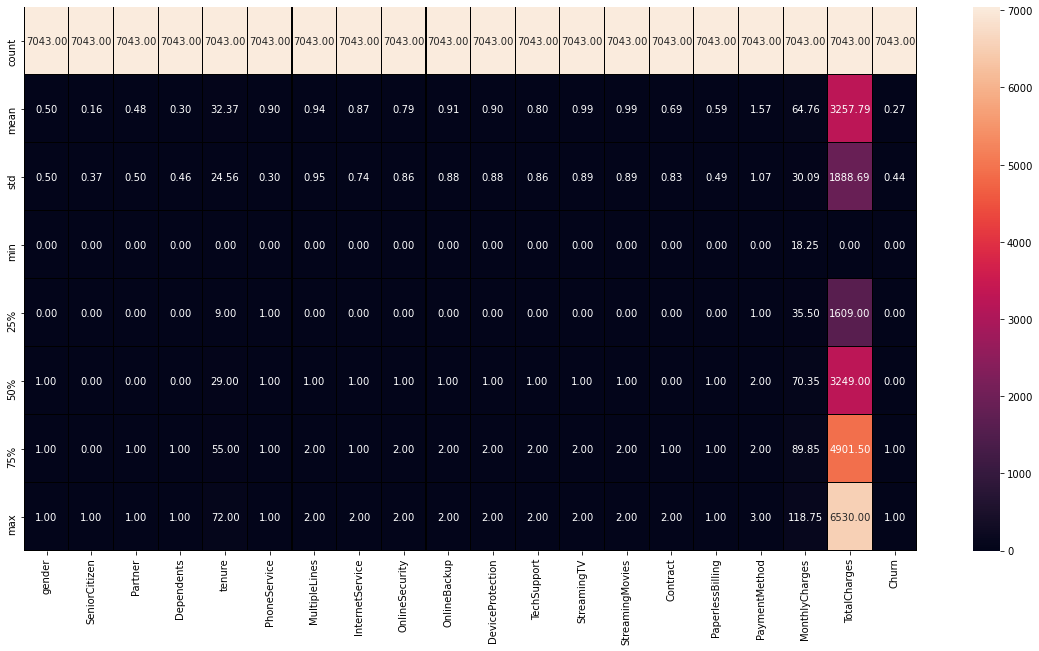

In [128]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [129]:
dfcor=df.corr()
dfcor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.090756,-0.195525


<AxesSubplot:>

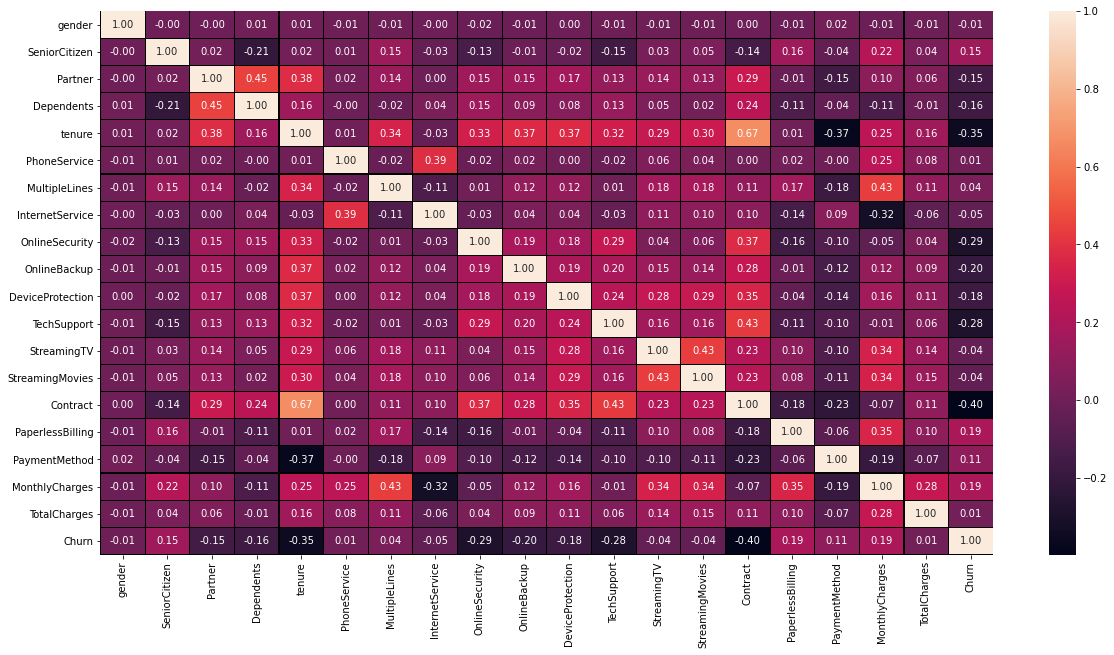

In [130]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Removing Outliers from the Dataset

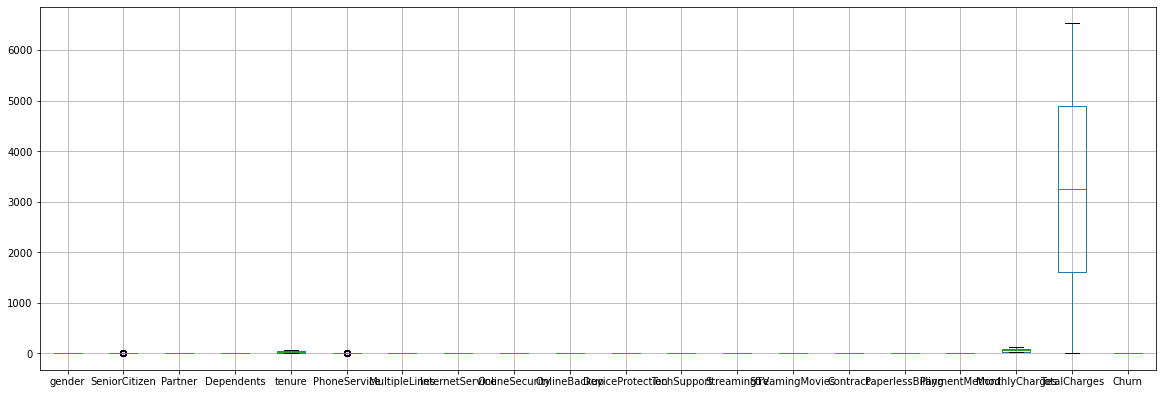

In [131]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [132]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.00955867, 0.43991649, 1.03453023, ..., 1.16032292, 0.39860759,
        0.60102348],
       [0.99053183, 0.43991649, 0.96662231, ..., 0.25962894, 0.94876238,
        0.60102348],
       [0.99053183, 0.43991649, 0.96662231, ..., 0.36266036, 1.64188328,
        1.66382851],
       ...,
       [1.00955867, 0.43991649, 1.03453023, ..., 1.1686319 , 0.13968008,
        0.60102348],
       [0.99053183, 2.27315869, 1.03453023, ..., 0.32033821, 0.31653445,
        1.66382851],
       [0.99053183, 0.43991649, 0.96662231, ..., 1.35896134, 1.13801338,
        0.60102348]])

In [133]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550,0


In [134]:
df.shape

(7043, 20)

In [135]:
df_new.shape

(6361, 20)

In [136]:
Data_loss=((7043-6361)/7043*100)
Data_loss

9.683373562402386

# To ckeck distribution of Skewness.

In [137]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

In [138]:
x=df.drop('Churn',axis=1)
y=df['Churn']

To handle Skewness using Power transform function.

In [139]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [140]:
df_new.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure             -0.243325
PhoneService       -2.727153
MultipleLines       0.033697
InternetService    -0.072384
OnlineSecurity      0.149362
OnlineBackup       -0.001417
DeviceProtection    0.001051
TechSupport         0.139751
StreamingTV        -0.097211
StreamingMovies    -0.105641
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.207559
MonthlyCharges     -0.259035
TotalCharges       -0.290854
dtype: float64

In [141]:
x=df_new
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.644343,-3.054010,0.334585,-1.252568,-0.977199,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,-1.158541,-0.282548
1,0.990532,-0.439916,-0.966622,-0.654012,0.297205,0.327438,-1.015015,-1.252568,1.258702,-1.078800,1.163539,-0.983227,-1.151526,-1.158239,0.790424,-1.205113,1.318899,-0.239492,-0.884382
2,0.990532,-0.439916,-0.966622,-0.654012,-1.495444,0.327438,-1.015015,-1.252568,1.258702,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,-0.342665,-1.937097
3,0.990532,-0.439916,-0.966622,-0.654012,0.646327,-3.054010,0.334585,-1.252568,1.258702,-1.078800,1.163539,1.252625,-1.151526,-1.158239,0.790424,-1.205113,-1.489837,-0.731079,-0.926430
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.495444,0.327438,-1.015015,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,0.213545,-1.249955


# Classification model

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.63,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is " ,maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8134294727354664  on Random_state  56


In [143]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.63, random_state=56)

# Logistic Regression model

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8134294727354664
[[2973  298]
 [ 530  637]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3271
           1       0.68      0.55      0.61      1167

    accuracy                           0.81      4438
   macro avg       0.76      0.73      0.74      4438
weighted avg       0.80      0.81      0.81      4438



# Decision Tree Classifier model

In [145]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

0.7280306444344299
[[2700  571]
 [ 636  531]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3271
           1       0.48      0.46      0.47      1167

    accuracy                           0.73      4438
   macro avg       0.65      0.64      0.64      4438
weighted avg       0.72      0.73      0.73      4438



# Random Forest Classifier Model

In [146]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7859396124380351
[[2947  324]
 [ 626  541]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      3271
           1       0.63      0.46      0.53      1167

    accuracy                           0.79      4438
   macro avg       0.73      0.68      0.70      4438
weighted avg       0.77      0.79      0.77      4438



# SVC Model

In [147]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.7951780081117621
[[2987  284]
 [ 625  542]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3271
           1       0.66      0.46      0.54      1167

    accuracy                           0.80      4438
   macro avg       0.74      0.69      0.71      4438
weighted avg       0.78      0.80      0.78      4438



# Cross Validation of model

In [148]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("cross validation score of LogisticRegression model:",scr.mean())

cross validation score of LogisticRegression model: 0.8039196077166268


In [149]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x, y, cv=5)
print("cross validation score of DecisionTree model:",scr.mean())

cross validation score of DecisionTree model: 0.7279559366733338


In [150]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x, y, cv=5)
print("cross validation score of RandomForest model:",scr.mean())

cross validation score of RandomForest model: 0.7907146227175946


In [151]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc, x, y, cv=5)
print("cross validation score of SVC model:",scr.mean())

cross validation score of SVC model: 0.7966794228659915


# Hyper parameter Tuning

In [152]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

Hyperparameter tuning for Logistic Regression Model

In [153]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
             'C':[1e-5,1e-4,1e-2,1e-1,1,10,100]}
             
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']})

In [154]:
GCV.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [155]:
mod=LogisticRegression(C=10,penalty='l1',solver='liblinear',random_state=56)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

81.41054529067148


# ROC_AUC Score for Logistic Regressor Model

In [157]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf=LogisticRegression(C=10,penalty='l1',solver='liblinear',random_state=56).fit(X,y)
roc_auc_score(y,clf.predict_proba(X)[:,1])
roc_auc_score(y,clf.decision_function(X))

0.9972913693779398

ROC_AUC curve for Logistic Regressor Model

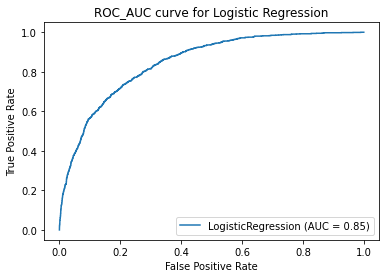

In [158]:
lr=LogisticRegression(C=10,penalty='l1',solver='liblinear',random_state=56)
lr.fit(x_train,y_train)
lr_disp=plot_roc_curve(lr,x_test,y_test)
plt.title('ROC_AUC curve for Logistic Regression')
plt.show()

Hyperparameter tuning for Decision Tree Classifier Model

In [159]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),
             'criterion':['gini','entropy']}
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [160]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [161]:
mod=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=56)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

78.18837314105453


# ROC_AUC Score for Decision Tree Classifier Model

In [162]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf1=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=56).fit(X,y)
roc_auc_score(y,clf1.predict_proba(X)[:,1])

0.9942193858675545

ROC_AUC curve for Decision Tree Classifier Model

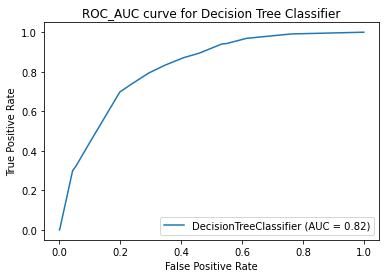

In [163]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=56)
dt.fit(x_train,y_train)
dt_disp=plot_roc_curve(dt,x_test,y_test)
plt.title('ROC_AUC curve for Decision Tree Classifier')
plt.show()

Hyperparameter tuning for Random Forest Classifier Model

In [164]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto','sqrt','log2']}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']})

In [165]:
GCV.best_params_

{'max_features': 'auto'}

In [166]:
mod=RandomForestClassifier(max_features='auto',random_state=56)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

79.38260477692654


ROC_AUC Score for Random Forest Classifier Model

In [167]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf2=RandomForestClassifier(max_features='auto',random_state=56).fit(X,y)
roc_auc_score(y,clf2.predict_proba(X)[:,1])

1.0

ROC_AUC curve for Random Forest Classifier Model

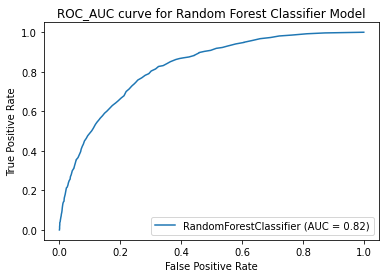

In [168]:
rf=RandomForestClassifier(max_features='auto',random_state=56)
rf.fit(x_train,y_train)
rf_disp=plot_roc_curve(rf,x_test,y_test)
plt.title('ROC_AUC curve for Random Forest Classifier Model')
plt.show()

Hyperparameter tuning for SVC model

In [169]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}
GCV=GridSearchCV(SVC(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [170]:
GCV.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [171]:
mod=SVC(C=1000,gamma=0.0001,kernel='rbf',random_state=56)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

80.68949977467328


ROC_AUC Score for SVC Model

In [172]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
X,y=load_breast_cancer(return_X_y=True)
clf2=SVC(C=1000,gamma=0.0001,kernel='rbf',random_state=56).fit(X,y)
roc_auc_score(y,clf2.predict(X))

0.9985994397759104

ROC_AUC curve for SVC Model

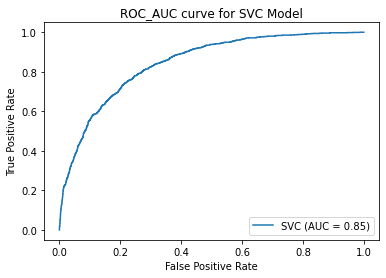

In [173]:
svc=SVC(C=1000,gamma=0.0001,kernel='rbf',random_state=56)
svc.fit(x_train,y_train)
svc_disp=plot_roc_curve(svc,x_test,y_test)
plt.title('ROC_AUC curve for SVC Model')
plt.show()

Compare with Actual Final Vs Sample Prediction

,Y Test,Prediction
6046,0,1
6494,0,0
2702,0,0
1532,0,0
3999,1,1


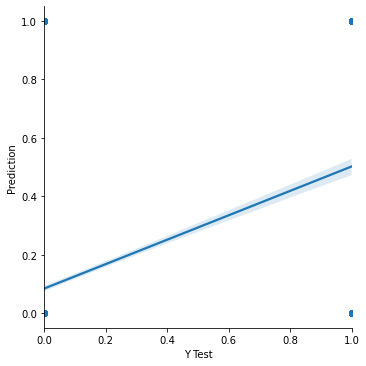

In [174]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':pred},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

# Saving the Model

In [175]:
import joblib
joblib.dump(mod,"Customer Churn Analysis.pkl")

['Customer Churn Analysis.pkl']

# Loading the saved model

In [176]:
model=joblib.load("Customer Churn Analysis.pkl")
prediction=model.predict(x_test)
print(accuracy_score(y_test,prediction)*100)

80.68949977467328


In [177]:
prediction=pd.DataFrame(prediction)  # Converting into Data Frame
prediction.to_csv('Results of Customer Churn Analysis.csv')
prediction.head()

,0
0,1
1,0
2,0
3,0
4,1
